## Importing all Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
from joblib import dump, load

## Reading CSV Data:
### User must supply a CSV file containing values like in the following examples:

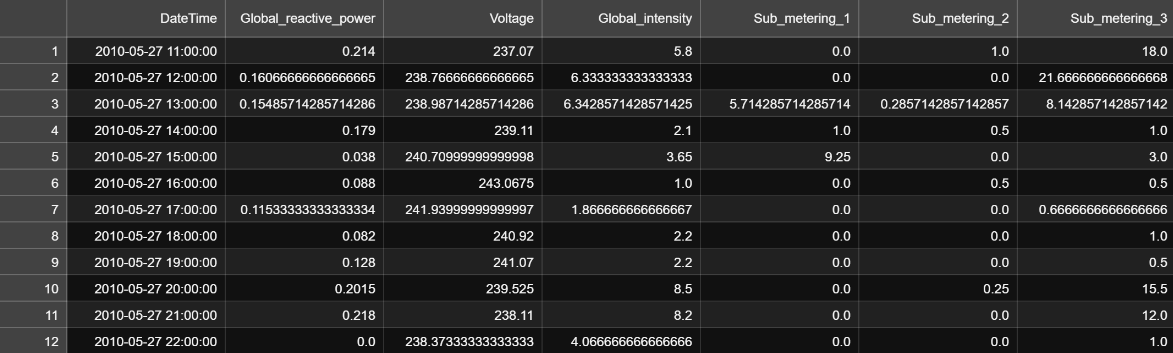

In [4]:
df_test = pd.read_csv('Company_Data.xls', delimiter=',', low_memory=False)
df_test.set_index('DateTime', inplace=True)

In [5]:
df_test.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,
2010-06-04 16:00:00,0.077000,239.283667,6.133333,0.0,0.066667,19.116667
2010-06-04 17:00:00,0.150567,240.398500,3.400000,0.0,0.466667,8.716667
2010-06-04 18:00:00,0.212576,241.204915,2.291525,0.0,0.322034,1.610169
2010-06-04 19:00:00,0.204800,241.753667,1.760000,0.0,0.233333,0.650000
2010-06-04 20:00:00,0.222567,243.747500,2.166667,0.0,0.500000,1.566667


## Loading in pre-trained SVM and Linear Regression Models:

In [6]:
# Load the saved models from files
loaded_SVM_typical_to_high = load('SVM_typical_to_high.joblib')
loaded_SVM_typical_to_low = load('SVM_typical_to_low.joblib')
loaded_linear_reg_model = load('ActiveEnergy_LinearRegression.joblib')

c:\Users\tyler\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\tyler\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## Running predictions for High, Low, or Typical energy usage:

In [121]:
predictions_model_one = loaded_SVM_typical_to_high.predict(df_test)
predictions_model_two = loaded_SVM_typical_to_low.predict(df_test)

## Running predictions for Linear Regression to populate the Global Active Power usage column of the dataset:

In [122]:
predictions = loaded_linear_reg_model.predict(df_test)

df_test['Global_active_power'] = predictions

columns_order = ['Global_active_power'] + df_test.columns[df_test.columns != 'Global_active_power'].tolist()
df_test = df_test.reindex(columns=columns_order)

SVM_Ready_df = df_test
SVM_Ready_df.index = pd.to_datetime(SVM_Ready_df.index)

## The following shows data that can be showed back to the user via the UI system:

In [123]:
# Count the occurrences of True values in predictions_model_one
true_count1 = sum(predictions_model_one)
# Print the count of True values
print("Number of True values (High energy usage) predicted by Model One:", true_count1)

# Count the occurrences of True values in predictions_model_two
true_count2 = sum(predictions_model_two)
# Print the count of True values
print("Number of True values (Low energy usage) predicted by Model Two:", true_count2)

typical_sum = SVM_Ready_df.shape[0] - true_count1 - true_count2
print("Number of False-False values (Typical energy usage) predicted by the SVM Models:", typical_sum)


mean = sum(predictions) / len(predictions) 
variance = sum([((x - mean) ** 2) for x in predictions]) / len(predictions) 
res = variance ** 0.5
 
# Printing result 
print("\nLength of list : " + str(len(predictions)))
print("\nMean of sample is : " + str(mean)) 
print("Mean of daily sample is : " + str(mean * 24)) 
print("\nMax of sample is : " + str(max(predictions)))
print("Max of daily sample is : " + str(max(predictions) * 24)) 
print("\nMin of sample is : " + str(min(predictions)))
print("Min of daily sample is : " + str(min(predictions) * 24)) 
print("\nStandard deviation of sample is : " + str(res)) 

Number of True values (High energy usage) predicted by Model One: 125
Number of True values (Low energy usage) predicted by Model Two: 9
Number of False-False values (Typical energy usage) predicted by the SVM Models: 866

Length of list : 1000

Mean of sample is : 0.9359137189084167
Mean of daily sample is : 22.461929253802

Max of sample is : 3.9805137021021926
Max of daily sample is : 95.53232885045261

Min of sample is : 0.23581375096727353
Min of daily sample is : 5.659530023214565

Standard deviation of sample is : 0.6105894770493557


## The following shows diagrams based on the given data that can be showed back to the user via the UI system:

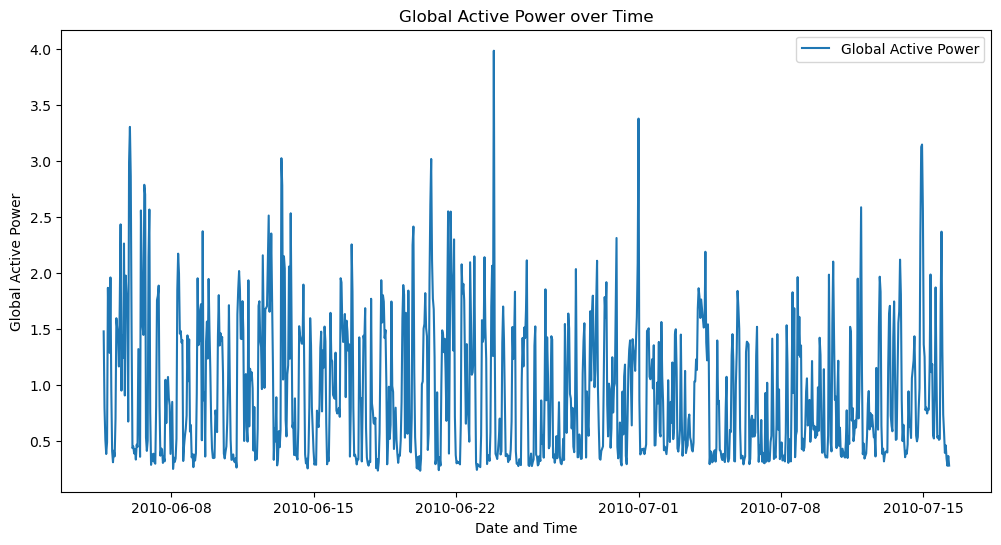

In [124]:
# Time series plot for Global Active Power
plt.figure(figsize=(12, 6))
plt.plot(SVM_Ready_df.index, SVM_Ready_df['Global_active_power'], label='Global Active Power')
plt.xlabel('Date and Time')
plt.ylabel('Global Active Power')
plt.title('Global Active Power over Time')
plt.legend()
plt.show()

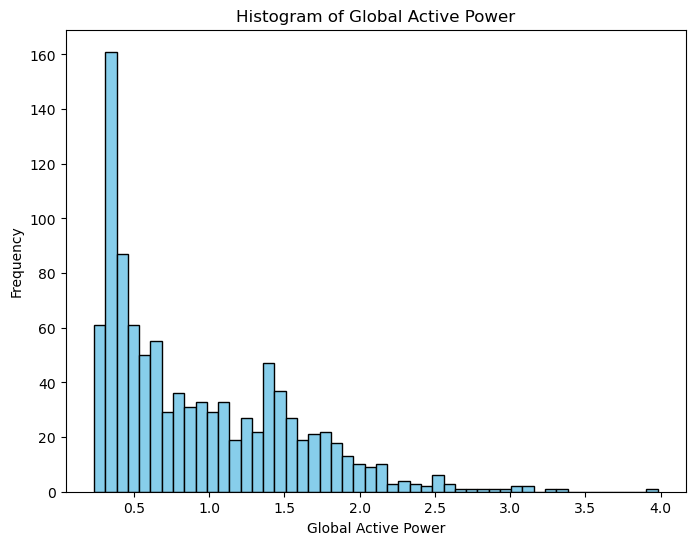

In [125]:
# Histogram of Global Active Power
plt.figure(figsize=(8, 6))
plt.hist(SVM_Ready_df['Global_active_power'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Global Active Power')
plt.ylabel('Frequency')
plt.title('Histogram of Global Active Power')
plt.show()

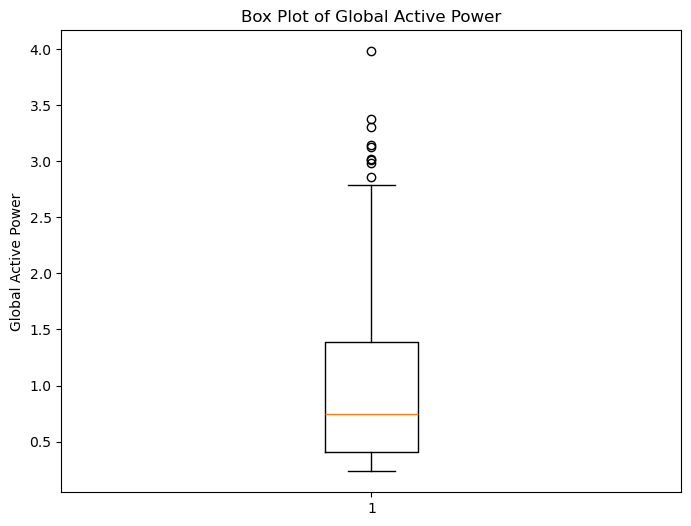

In [126]:
# Box plot of Global Active Power
plt.figure(figsize=(8, 6))
plt.boxplot(SVM_Ready_df['Global_active_power'])
plt.ylabel('Global Active Power')
plt.title('Box Plot of Global Active Power')
plt.show()

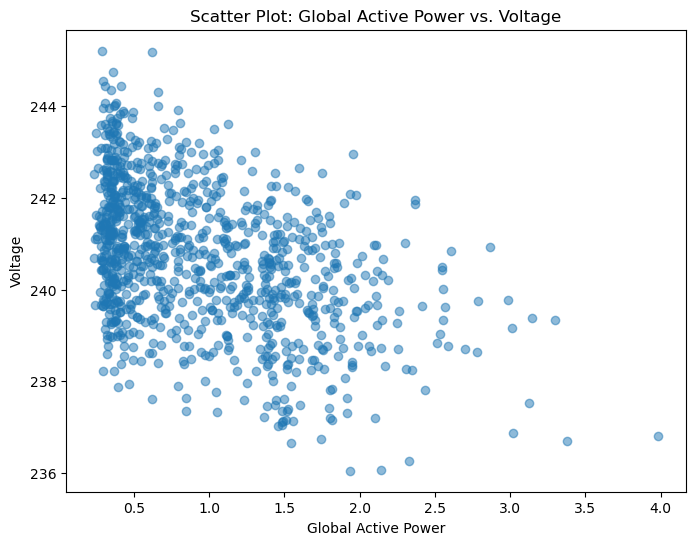

In [127]:
# Scatter plot of Global Active Power vs. Voltage
plt.figure(figsize=(8, 6))
plt.scatter(SVM_Ready_df['Global_active_power'], SVM_Ready_df['Voltage'], alpha=0.5)
plt.xlabel('Global Active Power')
plt.ylabel('Voltage')
plt.title('Scatter Plot: Global Active Power vs. Voltage')
plt.show()

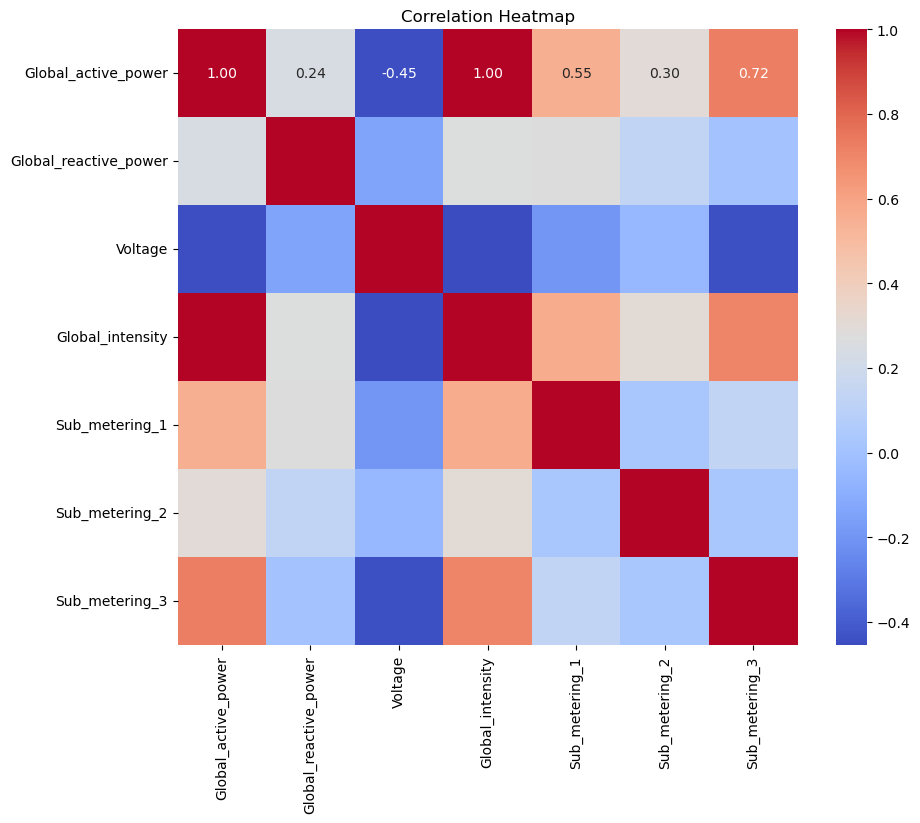

In [128]:
# Drop the target column from the correlation matrix (Reason: non-numeric column)
corr_matrix = SVM_Ready_df.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

C:\Users\joshm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joshm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joshm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joshm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

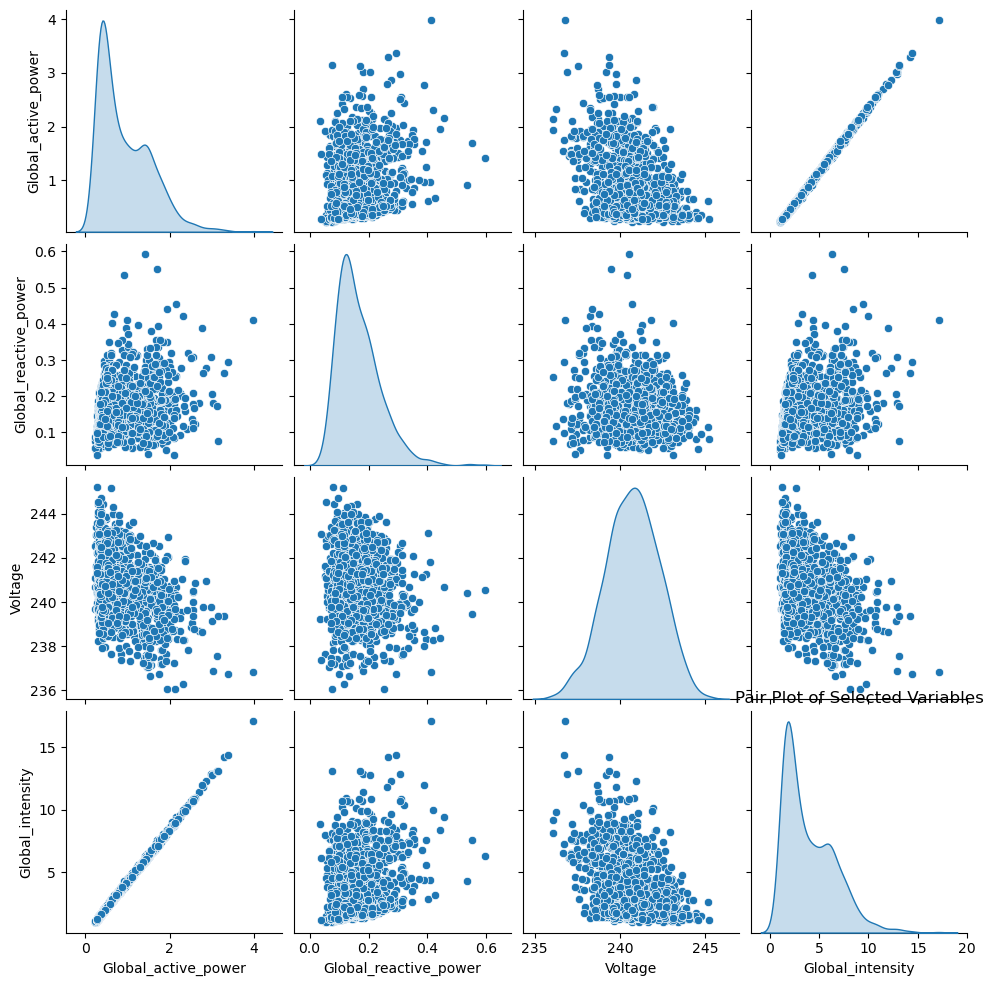

In [129]:
# Pair plot of dataset features
sns.pairplot(SVM_Ready_df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], diag_kind='kde')
plt.title('Pair Plot of Selected Variables')
plt.show()

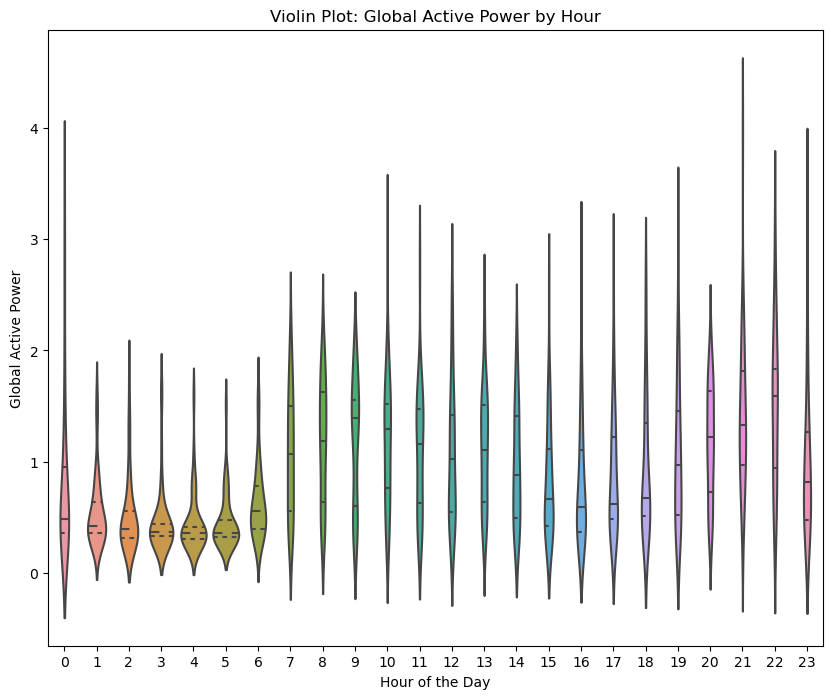

In [130]:
# Violin plot of Global Active Power by Hour
plt.figure(figsize=(10, 8))
sns.violinplot(x=SVM_Ready_df.index.hour, y=SVM_Ready_df['Global_active_power'], inner="quartile")
plt.xlabel('Hour of the Day')
plt.ylabel('Global Active Power')
plt.title('Violin Plot: Global Active Power by Hour')
plt.show()